# A decision tree to predict whether or not a patient has diabetes based on risk factors
# Authors :
* Vargas Bravo Paola
* Illescas Coria Janet

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Show first rows to comprehend dataset structure
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(df.isnull().sum())


X = df.drop('Outcome', axis=1)  
y = df['Outcome']               


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, 
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_tree_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [18]:
y_pred = best_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Optimized Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



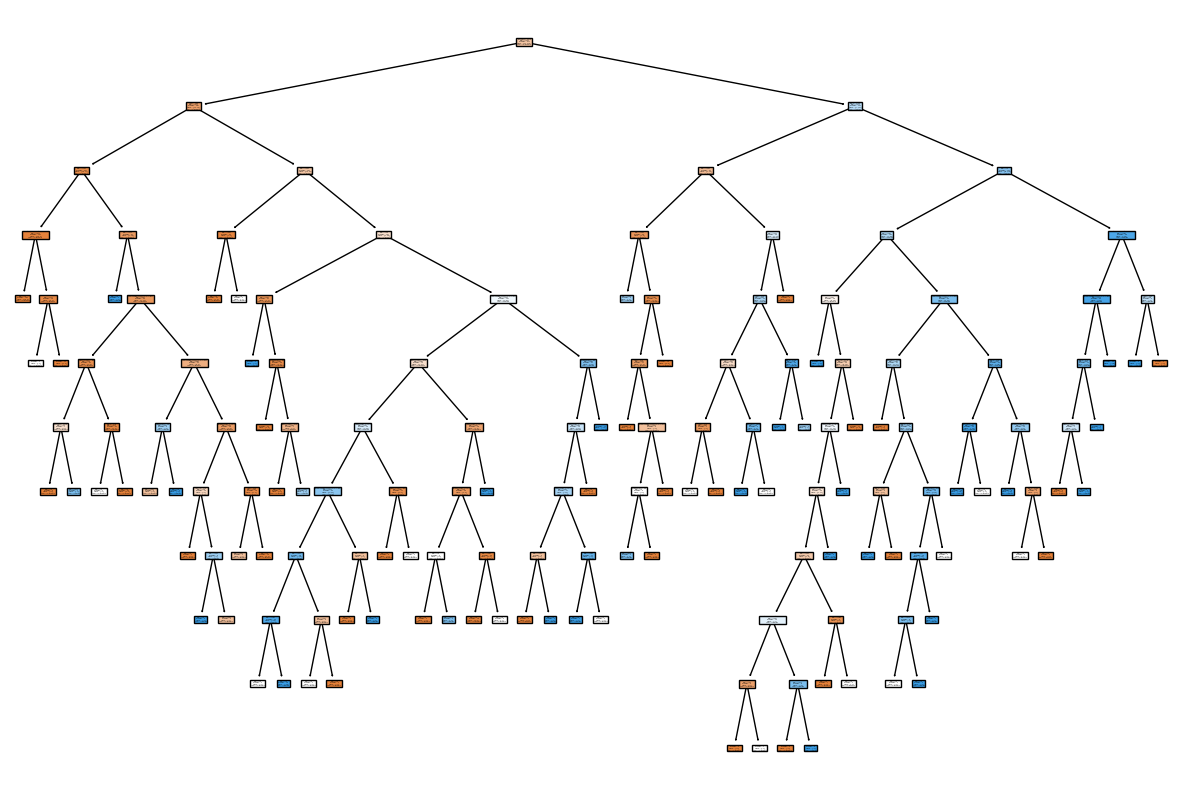

In [19]:
plt.figure(figsize=(15,10))
plot_tree(best_tree_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()
